In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import time
import math

%load_ext Cython

In [52]:
%%cython
import numpy as np
cimport numpy as np
from cpython cimport array
import array


def verse(np.ndarray[int, ndim=1] himg):
    if (himg[0]>himg[1] and himg[0]>himg[2]):
        himg[1]=himg[2]=himg[0]
    elif (himg[1]>himg[2]):
        himg[0]=himg[2]=himg[1]
    else:
        himg[1]=himg[0]=himg[2]
        
        
def verse2(np.ndarray[double, ndim=1] himg):
    if (himg[0]>himg[1] and himg[0]>himg[2]):
        himg[1]=himg[2]=himg[0]
    elif (himg[1]>himg[2]):
        himg[0]=himg[2]=himg[1]
    else:
        himg[1]=himg[0]=himg[2]

        

def overkill(np.ndarray[double, ndim=3] img):
    cdef int i=0, j=0, v1, v2;
    cdef np.ndarray[double, ndim=3] img2=np.zeros((img.shape[0], img.shape[1], 3), dtype='float64')
    
    v1=img.shape[0]
    v2=img.shape[1]
    
    for i in range(v1):
        for j in range(v2):
            img2[i,j,0]=img[i,j,0]
            img2[i,j,1]=img[i,j,1]
            img2[i,j,2]=img[i,j,2]
            
            verse2(img2[i,j])
    return img2
            

def purify(np.ndarray[int, ndim=3] img):
    cdef np.ndarray[int, ndim=1] vv=np.zeros((2, ), dtype='int32')
    cdef np.ndarray[int, ndim=1] z=np.zeros((2, ), dtype='int32')
    cdef np.ndarray[int, ndim=2] t=np.zeros((4, 2), dtype='int32')
    
    
    cdef np.ndarray[int, ndim=3] img2=np.zeros((img.shape[0], img.shape[1], 3), dtype='int32')
    cdef np.ndarray[int, ndim=2] check=np.zeros((img.shape[0], img.shape[1]), dtype='int32')
    cdef np.ndarray[int, ndim=2] ch2=np.zeros((img.shape[0], img.shape[1]), dtype='int32')
    cdef np.ndarray[int, ndim=2] F=np.zeros((img.shape[0]*img.shape[1]*3, 2), dtype='int32')
    cdef int iF=0, jF=1, i=0, j=0, ij=0, summ=0
    
    
    vv[0]=img.shape[0]
    vv[1]=img.shape[1]
    F[0,0]=0
    F[0,1]=0
    
    for i in range(0, vv[0]):
        for j in range(0, vv[1]):
            verse(img[i,j])
            img2[i,j,0]=img[i,j,0]
            img2[i,j,1]=img[i,j,1]
            img2[i,j,2]=img[i,j,2]    
    
    while (iF<jF):
        z[0]=F[iF,0]
        z[1]=F[iF,1]
        
        t[0,0]=z[0]-1
        t[0,1]=z[1]
        
        t[1,0]=z[0]
        t[1,1]=z[1]-1
        
        t[2,0]=z[0]+1
        t[2,1]=z[1]
        
        t[3,0]=z[0]
        t[3,1]=z[1]+1
        
        if (z[0]>0 and img2[t[0,0],t[0,1],0]==0 and check[t[0,0],t[0,1]]==0):
            F[jF,0]=t[0,0]
            F[jF,1]=t[0,1]
            check[t[0,0],t[0,1]]=1
            jF+=1
            
        if (z[1]>0 and img2[t[1,0],t[1,1],0]==0 and check[t[1,0],t[1,1]]==0):
            F[jF,0]=t[1,0]
            F[jF,1]=t[1,1]
            check[t[1,0],t[1,1]]=1
            jF+=1
            
        if (z[0]+1<vv[0] and img2[t[2,0],t[2,1],0]==0 and check[t[2,0],t[2,1]]==0):
            F[jF,0]=t[2,0]
            F[jF,1]=t[2,1]
            check[t[2,0],t[2,1]]=1
            jF+=1
            
        if (z[1]+1<vv[1] and img2[t[3,0],t[3,1],0]==0 and check[t[3,0],t[3,1]]==0):
            F[jF,0]=t[3,0]
            F[jF,1]=t[3,1]
            check[t[3,0],t[3,1]]=1
            jF+=1
        
        iF+=1
    
    for i in range(0, vv[0]):
        for j in range(0, vv[1]):            
            if (img2[i,j,0]==255 and ch2[i,j]==0):
                F[0,0]=i
                F[0,1]=j
                
                iF=0
                jF=1
                while (iF<jF):
                    
                    z[0]=F[iF,0]
                    z[1]=F[iF,1]

                    t[0,0]=z[0]-1
                    t[0,1]=z[1]

                    t[1,0]=z[0]
                    t[1,1]=z[1]-1

                    t[2,0]=z[0]+1
                    t[2,1]=z[1]

                    t[3,0]=z[0]
                    t[3,1]=z[1]+1
                    
                    if (z[0]>0 and ch2[t[0,0],t[0,1]]==0 and check[t[0,0],t[0,1]]==0):
                        F[jF,0]=t[0,0]
                        F[jF,1]=t[0,1]
                        ch2[t[0,0],t[0,1]]=1
                        jF+=1

                    if (z[1]>0 and ch2[t[1,0],t[1,1]]==0 and check[t[1,0],t[1,1]]==0):
                        F[jF,0]=t[1,0]
                        F[jF,1]=t[1,1]
                        ch2[t[1,0],t[1,1]]=1
                        jF+=1

                    if (z[0]+1<vv[0] and ch2[t[2,0],t[2,1]]==0 and check[t[2,0],t[2,1]]==0):
                        F[jF,0]=t[2,0]
                        F[jF,1]=t[2,1]
                        ch2[t[2,0],t[2,1]]=1
                        jF+=1

                    if (z[1]+1<vv[1] and ch2[t[3,0],t[3,1]]==0 and check[t[3,0],t[3,1]]==0):
                        F[jF,0]=t[3,0]
                        F[jF,1]=t[3,1]
                        ch2[t[3,0],t[3,1]]=1
                        jF+=1
                    
                    iF+=1
                
                if (jF<100):
                    summ+=jF
                    for jj in range(0, jF):
                        img2[F[jj,0],F[jj,1],0]=0
                        img2[F[jj,0],F[jj,1],1]=0
                        img2[F[jj,0],F[jj,1],2]=0
                #Pouring colors upon blackening world
                #else:
                #    for jj in range(0, jF):
                #        img2[F[jj,0],F[jj,1],0]=255
                #        img2[F[jj,0],F[jj,1],1]=255
                #        img2[F[jj,0],F[jj,1],2]=255
    return img2

def overkill(np.ndarray[double, ndim=3] img):
    cdef int i=0, j=0, v1, v2;
    cdef np.ndarray[double, ndim=3] img2=np.zeros((img.shape[0], img.shape[1], 3), dtype='float64')
    
    v1=img.shape[0]
    v2=img.shape[1]
    
    for i in range(v1):
        for j in range(v2):
            img2[i,j,0]=255-img[i,j,0]
            img2[i,j,1]=255-img[i,j,1]
            img2[i,j,2]=255-img[i,j,2]
            
    return img2

def summarise(np.ndarray[unsigned char, ndim=2] img, double cs):
    cdef np.ndarray[int, ndim=1] summa=np.zeros((img.shape[0]), dtype='int32')
    cdef int i=0, j=0, x, y;
    
    if (cs==0):
        for i in range(img.shape[0]):
            x=0
            y=i
            while (y<img.shape[0] and x<img.shape[1]):
                summa[i]=summa[i]+img[y,x]
                x+=1
    elif (cs==1.0):
        for i in range(img.shape[1]):
            x=i
            y=0
            while (y<img.shape[0] and x<img.shape[1]):
                summa[i]=summa[i]+img[y,x]
                y+=1
    return summa

In [8]:
v=list(os.walk('./zdjs/Trivial'))

f=[0]*200
j=0
for i in range(0, len(v)):
    for x in (v[i][2]):
        f[j]=cv.imread(v[i][0]+'/'+x, cv.IMREAD_COLOR)[...,::-1]/255
        j+=1
        
def grave(img, biw=0):
    fig, ax=plt.subplots(1,1,figsize=(18,18))
    if (biw==1):
        ax.imshow(img, cmap='Greys',  interpolation='nearest')
    else:
        ax.imshow(img)
    plt.show()

float64


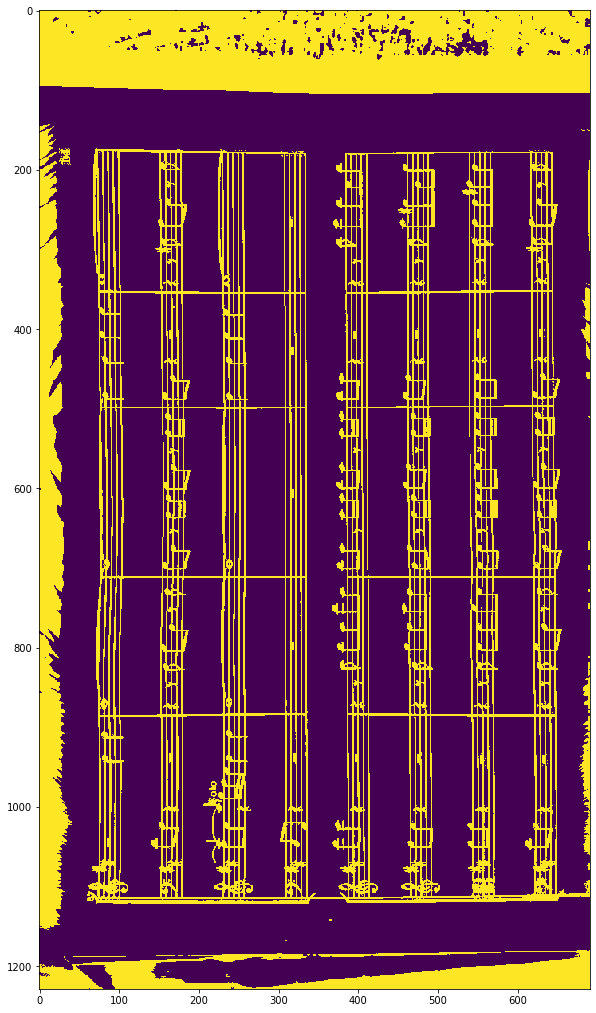

(1229, 691, 3)


In [200]:
kernel=[0]*10
#kernele do grafiki
kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
dm=(7,7)
kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])

img = f[0].copy()
print(img.dtype)
img=(img*255).astype('uint8')
dst = cv.fastNlMeansDenoisingColored(img,None,3,3,7,21)

grayscaled = cv.cvtColor((dst*255).astype('uint8'),cv.COLOR_BGR2GRAY)
th = cv.adaptiveThreshold(grayscaled, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 95, 1)
#th = cv.adaptiveThreshold(grayscaled, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 95, 1)

edges = cv.Canny(th,50,150,apertureSize = 3)

minLineLength = 100
maxLineGap = 10
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

cosa=[0]*len(lines)
for i, iv in enumerate(lines):
    x1,y1,x2,y2=iv[0]
    fx, fy=x1, y1
    dx, dy=(x2-x1), (y2-y1)
    
    cosa[i]=abs(dy)/math.sqrt(dy*dy+dx*dx)    
    cv.line(img,(x1,y1),(x2,y2),(255,0,0),1)

cosa=sorted(cosa)
i=math.floor(0.4*len(cosa))
n=math.ceil(0.6*len(cosa))
x=np.mean(cosa[i:n])

#Do cythona po podrasowaniu
summa=summarise(th, x)
grave(th)
cs=x

#cv.line(img,(0,50),(200,50),(255,0,0),1)
cv.line(img,(210,50),(210,300),(0,0,255),1)
cv.line(img,(260,50),(260,300),(0,0,255),1)
#cv.line(img,(0,400),(200,400),(255,0,0),1)
print(img.shape)
#grave(img)
if (cs==1):
    jj=0
    bethon=[0]*1000
    y=0
    
    while (y<len(th[0])):
        svv=(th[:,y:y+50]//255).astype('int32')
        svg=(sorted(sum(svv), reverse=1))
        stv=zip(range(y, y+50), sum(svv))
        stv=(sorted(stv, key=lambda x:x[1], reverse=1))
        
        
        v1, v2=10, 60
        svv2=(th[:,y+v1:y+v2]//255).astype('int32')
        svg2=(sorted(sum(svv2), reverse=1))
        stv2=zip(range(y+v1, y+v2), sum(svv2))
        stv2=(sorted(stv2, key=lambda x:x[1], reverse=1))
        
        
        #Ta heura na razie jest koszmarna i nieuniwersalizowalna, choć idea pewnie dobra
        if (len(svg2)>5 and svg[4]==svg2[4] and svg[4]>400):
            bethon[jj]=(y+5, y+55, stv2[:5])
            
            jj+=1
            y+=50
        else:
            y+=1
        

#plt.hist(summa, bins=1000)
#plt.show()

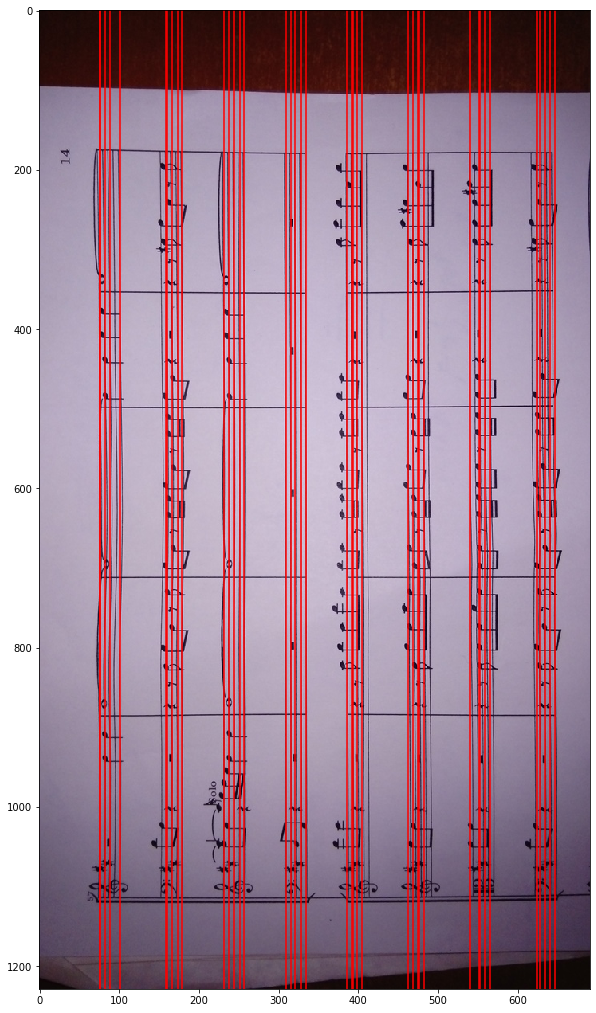

In [201]:
fig, ax=plt.subplots(1,1,figsize=(18,18))

img = f[0].copy()
for i in range(jj):
    #ax.axvline(bethon[i][0], color=(1,1,0))
    #ax.axvline(bethon[i][1])
    for x in bethon[i][2]:
        ax.axvline(x[0], color=(1,0,0))

ax.imshow(img)
plt.show()

In [165]:
y=210
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))

y=215
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))

y=290
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))

y=380
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))

y=530
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))
y=620
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))

y=255
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))


y=570
svv=(th[:,y:y+50]//255).astype('int32')
print(sorted(sum(svv)))

[123, 126, 133, 145, 145, 145, 146, 155, 160, 160, 175, 181, 184, 186, 192, 194, 198, 198, 203, 213, 216, 225, 245, 252, 261, 264, 273, 280, 281, 302, 315, 339, 364, 395, 399, 411, 461, 462, 595, 653, 664, 784, 799, 839, 846, 886, 904, 956, 1009, 1012]
[137, 140, 142, 142, 143, 145, 145, 155, 160, 160, 175, 181, 184, 186, 192, 194, 198, 198, 203, 213, 216, 225, 245, 252, 261, 264, 273, 280, 281, 302, 315, 339, 364, 395, 399, 411, 461, 462, 595, 653, 664, 784, 799, 839, 846, 886, 904, 956, 1009, 1012]
[109, 113, 114, 124, 125, 125, 127, 130, 130, 131, 132, 132, 133, 133, 133, 133, 137, 140, 142, 145, 146, 152, 156, 157, 161, 166, 169, 206, 208, 219, 246, 313, 317, 330, 360, 369, 400, 407, 485, 665, 705, 750, 790, 825, 837, 862, 869, 897, 928, 967]
[127, 129, 131, 133, 134, 136, 138, 138, 138, 139, 139, 142, 144, 145, 148, 154, 208, 222, 223, 254, 258, 262, 282, 287, 314, 336, 362, 366, 379, 379, 382, 461, 508, 509, 534, 558, 576, 580, 585, 600, 630, 633, 669, 671, 676, 692, 698, 753, 79

In [ ]:
kernel=[0]*10
#kernele do grafiki
kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
dm=(7,7)
kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])

ss=len(f)
for i in range(ss):
    img = f[i].copy()
    print(img.dtype)
    img=(img*255).astype('uint8')
    dst = cv.fastNlMeansDenoisingColored(img,None,3,3,7,21)
    
    grayscaled = cv.cvtColor((dst*255).astype('uint8'),cv.COLOR_BGR2GRAY)
    th = cv.adaptiveThreshold(grayscaled, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 95, 1)
    #th = cv.adaptiveThreshold(grayscaled, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 95, 1)
    
    edges = cv.Canny(th,50,150,apertureSize = 3)

    minLineLength = 100
    maxLineGap = 10
    lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    
    for i, iv in enumerate(lines):
        x1,y1,x2,y2=iv[0]
        cosa=(y2-y1)/math.sqrt((y2-y1)*(y2-y1)+(x2-x1)*(x2-x1))
        fx, fy=x1, y1
        dx, dy=(x2-x1), (y2-y1)

        cv.line(th,(x1,y1),(x2,y2),(255,0,0),1)
    grave(th)

In [ ]:
s1=np.asarray([[0,1,2],[3,4,5],[6,7,8]])
s2=np.zeros((s1.shape[0], s1.shape[1], 3), dtype="int64")
s2[:,:,0]=s2[:,:,1]=s2[:,:,2]=s1

print(s2)

In [ ]:
#grave(f[0])

img = (f[0]*255).astype('uint8').copy()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

minLineLength = 100
maxLineGap = 10
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#lineland=[0]*len(lines)

for i, iv in enumerate(lines):
    x1,y1,x2,y2=iv[0]
    cosa=(y2-y1)/math.sqrt((y2-y1)*(y2-y1)+(x2-x1)*(x2-x1))
    #lineland[i]=(cosa, iv[0])
    
    fx, fy=x1, y1
    dx, dy=(x2-x1), (y2-y1)
    #while (fx<x2 and fy<y2):
        
    
    cv.line(img,(x1,y1),(x2,y2),(255,0,0),1)
grave(img)

In [ ]:
kernel=[0]*10
#kernele do grafiki
kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
dm=(7,7)
kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])

mg=cv.filter2D(f[0], -1, kernel[5])
mg=cv.filter2D(mg, -1, kernel[5])
im2=cv.filter2D(mg, -1, kernel[1])
ret, thresh = cv.threshold(im2, 0.02, 1, 0)


minLineLength = 100
maxLineGap = 10
imgray=cv.cvtColor((thresh*255).astype('uint8'),cv.COLOR_BGR2GRAY)
lines = cv.HoughLinesP(imgray,1,np.pi/180,100,minLineLength,maxLineGap)
#lineland=[0]*len(lines)

for i, iv in enumerate(lines):
    x1,y1,x2,y2=iv[0]
    cosa=(y2-y1)/math.sqrt((y2-y1)*(y2-y1)+(x2-x1)*(x2-x1))
    #lineland[i]=(cosa, iv[0])
    
    fx, fy=x1, y1
    dx, dy=(x2-x1), (y2-y1)
    cv.line(thresh,(x1,y1),(x2,y2),(0,0,0),4)

#thresh=1-thresh
#for i in range(len(thresh)):
#    for j in range(len(thresh[0])):
        

grave(thresh)